<a href="https://colab.research.google.com/github/chilung/EmotionX2020/blob/master/pr_lab1_0686028.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reference
https://archive.ics.uci.edu/ml/datasets/Arcene

In [1]:
import logging

logging.basicConfig(level=logging.DEBUG, format='%(message)s')

logging.debug('Hello Debug')
logging.info('Hello Info')
logging.warning('Hello Warning')
logging.error('Hello Error')
logging.critical('Hello Critical')

Hello Debug
Hello Info
Hello Warning
Hello Error
Hello Critical


In [0]:
import re
import pandas as pd
from io import open
import glob
import os
import numpy as np
import math
from collections import OrderedDict
from collections import Counter
import torch
import torchvision
import heapq
import unicodedata
import string
import urllib.request as urllib

In [3]:
!ls

auc_area.cvs  h0_hypothesis.cvs  sample_data  similarity.cvs


In [0]:
w0 = 1
w1 = -1

#Dataset
The number of train dataset is 100 with 10000 features.
The number of valid dataset is also 100 with 10000 features.

In [0]:
http_data = urllib.urlopen("https://raw.githubusercontent.com/chilung/EmotionX2020/master/PR-HW-1/arcene_valid.data")
data_collect = {}
for i, data in enumerate(http_data):
  data_list = [d for d in data.decode("utf-8").split(' ')]
  data_collect[i] = [int(d) for d in data_list if d != '\n']


In [0]:
def get_data_from_http(http_addr):
  http_data = urllib.urlopen(http_addr)

  data_collect = {}
  for i, data in enumerate(http_data):
    data_list = [d for d in data.decode("utf-8").split(' ')]
    data_collect[i] = [int(d) for d in data_list if d != '\n']
  
  return data_collect

In [7]:
# the source of train data, but got SSL certificate error
# train_data_http_addr = "https://archive.ics.uci.edu/ml/machine-learning-databases/arcene/ARCENE/arcene_train.data"
train_data_http_addr = "https://raw.githubusercontent.com/chilung/EmotionX2020/master/PR-HW-1/arcene_valid.data"
# the source of valid data, but got SSL certificate error
# valid_data_http_addr = "https://archive.ics.uci.edu/ml/machine-learning-databases/arcene/ARCENE/arcene_valid.data"
valid_data_http_addr = "https://raw.githubusercontent.com/chilung/EmotionX2020/master/PR-HW-1/arcene_valid.data"

train_dataset = get_data_from_http(train_data_http_addr)
logging.info("number of train data set: {}".format(len(train_dataset)))
logging.info("number of train data feature: {}".format(len(train_dataset[0])))
logging.info("type of data: {}".format(type(train_dataset[0][0])))
logging.debug("the first train data (the first 100 items): {}".format(train_dataset[0][0:100]))

valid_dataset = get_data_from_http(valid_data_http_addr)
logging.info("number of valid data set: {}".format(len(valid_dataset)))
logging.info("number of valid data feature: {}".format(len(valid_dataset[0])))
logging.info("type of data: {}".format(type(valid_dataset[0][0])))
logging.debug("the first valid data (the first 100 items): {}".format(valid_dataset[0][0:100]))

number of train data set: 100
number of train data feature: 10000
type of data: <class 'int'>
the first train data (the first 100 items): [0, 0, 156, 138, 2, 635, 444, 0, 1, 0, 0, 0, 8, 32, 420, 0, 0, 0, 0, 0, 33, 2, 0, 0, 254, 255, 0, 170, 546, 0, 111, 105, 1, 55, 0, 0, 65, 0, 3, 0, 67, 0, 0, 0, 223, 0, 0, 134, 0, 80, 0, 0, 44, 377, 0, 4, 0, 0, 0, 0, 0, 0, 221, 0, 41, 0, 0, 269, 484, 0, 106, 0, 0, 213, 208, 195, 0, 0, 0, 2, 0, 40, 0, 30, 0, 1, 536, 24, 0, 0, 476, 74, 48, 0, 0, 0, 0, 287, 0, 0]
number of valid data set: 100
number of valid data feature: 10000
type of data: <class 'int'>
the first valid data (the first 100 items): [0, 0, 156, 138, 2, 635, 444, 0, 1, 0, 0, 0, 8, 32, 420, 0, 0, 0, 0, 0, 33, 2, 0, 0, 254, 255, 0, 170, 546, 0, 111, 105, 1, 55, 0, 0, 65, 0, 3, 0, 67, 0, 0, 0, 223, 0, 0, 134, 0, 80, 0, 0, 44, 377, 0, 4, 0, 0, 0, 0, 0, 0, 221, 0, 41, 0, 0, 269, 484, 0, 106, 0, 0, 213, 208, 195, 0, 0, 0, 2, 0, 40, 0, 30, 0, 1, 536, 24, 0, 0, 476, 74, 48, 0, 0, 0, 0, 287, 0, 0]


In [0]:
def get_label_from_http(http_addr):
  http_label = urllib.urlopen(http_addr)

  label_collect = []
  for i, label in enumerate(http_label):
    label_collect = label_collect + [int(d) for d in label.decode("utf-8").split('\n') if d != '']
  
  return label_collect

In [9]:
# the source of train label, but got SSL certificate error
# train_label_http_addr = "https://archive.ics.uci.edu/ml/machine-learning-databases/arcene/ARCENE/arcene_train.labels"
train_label_http_addr = "https://raw.githubusercontent.com/chilung/EmotionX2020/master/PR-HW-1/arcene_valid.labels"
# the source of valid label, but got SSL certificate error
# valid_label_http_addr = "https://archive.ics.uci.edu/ml/machine-learning-databases/arcene/arcene_valid.labels"
valid_label_http_addr = "https://raw.githubusercontent.com/chilung/EmotionX2020/master/PR-HW-1/arcene_valid.labels"

train_label = get_label_from_http(train_label_http_addr)
logging.info("number of train label: {}".format(len(train_label)))
logging.info("type of label: {}".format(type(train_label[0])))
logging.debug("the train label (the first 100 items): {}".format(train_label[0:100]))
pw0 = len([train_label[i] for i in train_label if i == 1]) / len(train_label)
logging.info(pw0)

valid_label = get_label_from_http(valid_label_http_addr)
logging.info("number of valid label: {}".format(len(valid_label)))
logging.info("type of label: {}".format(type(valid_label[0])))
logging.debug("the valid label (the first 100 items): {}".format(valid_label[0:100]))
pw1 = len([train_label[i] for i in train_label if i == -1]) / len(train_label)
logging.info(pw1)


number of train label: 100
type of label: <class 'int'>
the train label (the first 100 items): [-1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1]
0.44
number of valid label: 100
type of label: <class 'int'>
the valid label (the first 100 items): [-1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1]
0.56


#Calculate the Mean of a specified Feature in Specified Class
Function `mean_feature_class(data, label, f_index, class_set)`, the input paprmeters should be:
*   data: the whole dataset
*   label: the label of the data
*   f_index: feature index of the data, start from 0
*   class_set: 1 or -1 specified in the corresponding label

In [10]:
def mean_feature_class(data, label, f_index, class_set):
  logging.debug([format(data[i][f_index]) for i in data])
  logging.debug(label)
  logging.debug([data[i][f_index] for i in data if label[i] == class_set])
  return np.mean([data[i][f_index] for i in data if label[i] == class_set])

if logging.getLogger().getEffectiveLevel() == logging.DEBUG:
  logging.debug("mean of feature 0 in class 1: {}".format(mean_feature_class(train_dataset, train_label, 0, 1)))
  logging.debug("mean of feature 0 in class -1: {}".format(mean_feature_class(train_dataset, train_label, 0, -1)))

['0', '0', '0', '0', '0', '89', '28', '0', '0', '109', '0', '4', '89', '115', '0', '10', '46', '0', '0', '21', '0', '5', '0', '0', '127', '0', '35', '0', '0', '136', '24', '21', '0', '0', '135', '7', '0', '0', '83', '14', '0', '0', '33', '61', '114', '194', '0', '0', '45', '13', '14', '0', '65', '6', '17', '27', '18', '0', '147', '122', '0', '0', '37', '18', '1', '0', '7', '71', '0', '4', '122', '0', '128', '0', '0', '17', '10', '15', '141', '0', '48', '0', '7', '0', '0', '34', '114', '0', '130', '10', '0', '53', '14', '57', '0', '24', '11', '93', '119', '112']
[-1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1]
[0, 0, 89, 0, 0, 115, 46, 0, 0, 21, 0, 0, 127, 0, 0, 135, 83, 0, 114, 0, 45

#Calculate the Variance of a specified Feature in Specified Class
Function `var_feature_class(data, label, f_index, class_set)`, the input paprmeters should be:
*   data: the whole dataset
*   label: the label of the data
*   f_index: feature index of the data, start from 0
*   class_set: 1 or -1 specified in the corresponding label

In [11]:
def var_feature_class(data, label, f_index, class_set):
  logging.debug([format(data[i][f_index]) for i in data])
  logging.debug(label)
  logging.debug([data[i][f_index] for i in data if label[i] == class_set])
  return np.var([data[i][f_index] for i in data if label[i] == class_set])

if logging.getLogger().getEffectiveLevel() == logging.DEBUG:
  logging.debug("var of feature 0 in class 1: {}".format(var_feature_class(train_dataset, train_label, 8588, 1)))
  logging.debug("var of feature 0 in class -1: {}".format(var_feature_class(train_dataset, train_label, 8588, -1)))

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '29', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']
[-1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 29, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
var of 

#Features Selection According to H0 Test
```
g = ((xbar-ybar) - (ux-uy)) / sqrt(xvar/Nx + xvar/Ny)
where
g is the H0 test variable
xbar is the sample mean of specified feature in class 1
ybar is the sample mean of specified feature in class -1
ux is the real mean of specified feature in class 1
uy is the real mean of specified feature in class -1
xvar is the variance of specified feature in class 1
yvar is the variance of specified feature in class -1
Nx is the number of data of specified feature in class 1
Ny is the number of data of specified feature in class -1
```
We will have a hypothesis that ux = uy by setting ux-uy = 0 and to see if we can reject the H0 hypothesis in order to select the specified feature. In `reject_h0_hypothesis(data, label, f_index = 0, conf_level = 0.8)`, data is the dataset, label is the label corrseponding to the dataset data, f_index is the feature index, and conf_level is the confidence level as list in acceptance_interval collection.



In [12]:
acceptance_interval = {0.8: 1.282, 0.85: 1.440, 0.9: 1.645, 0.95: 1.967, 0.98: 2.326, 0.99: 2.576, 0.998: 3.090, 0.999: 3.291}
H0_hypothesis_file_path = 'h0_hypothesis.cvs'
#H0_hypothesis_file_path = "https://raw.githubusercontent.com/chilung/EmotionX2020/master/h0_hypothesis.cvs"  

def reject_h0_hypothesis(data, label, f_index = 0, conf_level = 0.8):

  xbar = mean_feature_class(data, label, f_index, w0)
  ybar = mean_feature_class(data, label, f_index, w1)
  xvar = var_feature_class(data, label, f_index, w0)
  yvar = var_feature_class(data, label, f_index, w1)
  Nx = len([label[i] for i in range(len(label)) if label[i] == w0])
  Ny = len([label[i] for i in range(len(label)) if label[i] == w1])

  if xvar == 0 and yvar == 0:
    # logging.info("feature {}: xvar: {}, yvar: {}".format(f_index, xvar, yvar))
    return False

  g = (xbar-ybar) / math.sqrt((xvar/Nx) + (yvar/Ny))
  return (abs(g) > acceptance_interval[conf_level])

if logging.getLogger().getEffectiveLevel() == logging.DEBUG:
  logging_level = logging.getLogger().getEffectiveLevel()
  logging.getLogger().setLevel(logging.INFO)

  h0_feature_selection_collection = {}
  for c_level in acceptance_interval:
    feature_selection = [reject_h0_hypothesis(train_dataset, train_label, i, c_level) for i in range(len(train_dataset[0]))]
    h0_feature_selection_collection[c_level] = feature_selection
    logging.info("confidence level {}, No. of feaature: {}, feature set (the first 100 items): {}".format(c_level, len(feature_selection), feature_selection[0:100]))
    logging.info("No. of selected feaature: {}".format((len([1 for i in feature_selection if i == True]))))
  
  h0_hypothesis_feature_selection_file = H0_hypothesis_file_path
  h0_df = pd.DataFrame({key:pd.Series(value) for key, value in h0_feature_selection_collection.items()})
  h0_df.to_csv(h0_hypothesis_feature_selection_file)

  logging.getLogger().setLevel(logging_level)

confidence level 0.8, No. of feaature: 10000, feature set (the first 100 items): [True, False, True, False, True, True, True, False, True, True, True, True, False, True, True, True, True, False, True, False, False, True, False, True, True, True, False, False, True, False, False, True, False, True, True, True, False, False, False, False, False, False, True, False, True, True, True, False, True, False, True, True, False, False, True, False, False, False, False, True, False, True, True, True, False, True, False, True, True, False, True, False, True, False, False, False, True, True, False, True, True, True, True, False, True, True, True, False, False, False, True, True, True, False, False, False, True, False, False, False]
No. of selected feaature: 5456
confidence level 0.85, No. of feaature: 10000, feature set (the first 100 items): [True, False, True, False, True, True, True, False, True, True, True, False, False, True, False, True, True, False, False, False, False, True, False, True, Tr

In [13]:
if os.path.isfile(H0_hypothesis_file_path):
  logging.info("import h0_feature_selection_collection from file {}".format(H0_hypothesis_file_path))
  df = pd.read_csv(H0_hypothesis_file_path)
  h0_feature_selection_collection = {}
  for c_level in acceptance_interval:
    feature_selection = [item for index, item in enumerate(df[str(c_level)]) if item != "NaN"]
    h0_feature_selection_collection[c_level] = feature_selection
    logging.info("confidence level {}, No. of feaature: {}, feature  (the first 100 items): {}".format(c_level, len(feature_selection), feature_selection[0:100]))
    logging.info("No. of selected feaature: {}".format((len([1 for i in feature_selection if i == True]))))
else:
  logging.info("{} not found. Process the H0 hypothesis on features selection.".format(H0_hypothesis_file_path))
  h0_feature_selection_collection = {}
  for c_level in acceptance_interval:
    feature_selection = [reject_h0_hypothesis(train_dataset, train_label, i, c_level) for i in range(len(train_dataset[0]))]
    h0_feature_selection_collection[c_level] = feature_selection
    logging.info("confidence level {}, No. of feaature: {}, feature set (the first 100 items): {}".format(c_level, len(feature_selection), feature_selection[0:100]))
    logging.info("No. of selected feaature: {}".format((len([1 for i in feature_selection if i == True]))))
  
  logging.info("export h0_feature_selection_collection to file {}".format(H0_hypothesis_file_path))
  h0_hypothesis_feature_selection_file = H0_hypothesis_file_path
  h0_df = pd.DataFrame({key:pd.Series(value) for key, value in h0_feature_selection_collection.items()})
  h0_df.to_csv(h0_hypothesis_feature_selection_file)

import h0_feature_selection_collection from file h0_hypothesis.cvs
confidence level 0.8, No. of feaature: 10000, feature  (the first 100 items): [True, False, True, False, True, True, True, False, True, True, True, True, False, True, True, True, True, False, True, False, False, True, False, True, True, True, False, False, True, False, False, True, False, True, True, True, False, False, False, False, False, False, True, False, True, True, True, False, True, False, True, True, False, False, True, False, False, False, False, True, False, True, True, True, False, True, False, True, True, False, True, False, True, False, False, False, True, True, False, True, True, True, True, False, True, True, True, False, False, False, True, True, True, False, False, False, True, False, False, False]
No. of selected feaature: 5456
confidence level 0.85, No. of feaature: 10000, feature  (the first 100 items): [True, False, True, False, True, True, True, False, True, True, True, False, False, True, False, 

#Features Selection According to ROCs and their corresponding AUC
We set the threshold from 0 to 999. By classifying the data to class w1 (-1) if the data is less than the threshold and to class w0 (1) if the data is larger than the threshold. We have `alpha`, the number of data classfied to w0 but w1 in real and `One_Beta` (1-Beta), the number of data classified to w0 and w0 in real.

In [14]:
auc_area = [0.15, 0.17, 0.19, 0.20, 0.25, 0.28, 0.3]
auc_area_file_path = 'auc_area.cvs'

def auc_feature_selction(data, label, f_index, area_criteron, data_range = 1000, ping_step = 20):
  num_w0 = len([label[i] for i in range(len(label)) if label[i] == w0])
  num_w1 = len([label[i] for i in range(len(label)) if label[i] == w1])

  alpha = []
  One_Beta = []

  ping_range = range(0, data_range, ping_step)

  for j in ping_range:
    class_w0 = [i for i in data if data[i][f_index] >= j] # classified to w0 (= 1)
    class_w1 = [i for i in data if data[i][f_index] < j] # classified to w1 (= -1)
    
    # logging.debug("class w0: {}".format(class_w0))
    # logging.debug("class w1: {}".format(class_w1))
    
    alpha = alpha + [len([i for i in class_w0 if label[i] == w1]) / num_w1] # alpha
    One_Beta = One_Beta + [len([i for i in class_w0 if label[i] == w0]) / num_w0] # 1 - Beta

  # logging.debug(alpha)
  # logging.debug(One_Beta)

  auc = 0
  for i in range(len(ping_range)-1):
    auc = auc + abs(((alpha[i]+alpha[i+1])-(One_Beta[i]+One_Beta[i+1])) * (alpha[i]-alpha[i+1]) / 2)
  
  return (auc >= area_criteron), alpha, One_Beta

if logging.getLogger().getEffectiveLevel() == logging.DEBUG:
  logging_level = logging.getLogger().getEffectiveLevel()
  logging.getLogger().setLevel(logging.INFO)

  auc_feature_selection_collection = {}
  for a_level in auc_area:
    feature_selection = [auc_feature_selction(train_dataset, train_label, i, a_level)[0] for i in range(len(train_dataset[0]))]
    auc_feature_selection_collection[a_level] = feature_selection
    logging.info("AUC area {}, No. of feaature: {}, feature set (the first 100 items): {}".format(a_level, len(feature_selection), feature_selection[0:100]))
    logging.info("No. of selected feaature: {}".format((len([1 for i in feature_selection if i == True]))))
  
  auc_area_feature_selection_file = auc_area_file_path
  auc_df = pd.DataFrame({key:pd.Series(value) for key, value in auc_feature_selection_collection.items()})
  auc_df.to_csv(auc_area_feature_selection_file)
  
  logging.getLogger().setLevel(logging_level)  

AUC area 0.15, No. of feaature: 10000, feature set (the first 100 items): [False, False, False, False, True, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, True, False, False, False, True, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, True, True, True, False, False, False, False, False, False, False]
No. of selected feaature: 2070
AUC area 0.17, No. of feaature: 10000, feature set (the first 100 items): [False, False, False, False, True, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, Fal

In [15]:
auc_area_file_path = 'auc_area.cvs'

if os.path.isfile(auc_area_file_path):
  logging.info("import auc_feature_selection_collection from file {}".format(auc_area_file_path))
  df = pd.read_csv(auc_area_file_path)
  auc_feature_selection_collection = {}
  for a_level in auc_area:
    feature_selection = [item for index, item in enumerate(df[str(a_level)]) if item != "NaN"]
    auc_feature_selection_collection[a_level] = feature_selection
    logging.info("AUC area {}, No. of feature: {}, feature set (the first 100 items): {}".format(a_level, len(feature_selection), feature_selection[0:100]))
    logging.info("No. of selected feaature: {}".format((len([1 for i in feature_selection if i == True]))))
else:
  logging.info("{} not found. Process the AUC area on features selection.".format(auc_area_file_path))
  auc_feature_selection_collection = {}
  for a_level in auc_area:
    feature_selection = [auc_feature_selction(train_dataset, train_label, i, a_level)[0] for i in range(len(train_dataset[0]))]
    auc_feature_selection_collection[a_level] = feature_selection
    logging.info("AUC area {}, No. of feature: {}, feature set (the first 100 items): {}".format(a_level, len(feature_selection), feature_selection[0:100]))
    logging.info("No. of selected feaature: {}".format((len([1 for i in feature_selection if i == True]))))
  
  logging.info("export auc_feature_selection_collection to file {}".format(auc_area_file_path))
  auc_area_feature_selection_file = auc_area_file_path
  auc_df = pd.DataFrame({key:pd.Series(value) for key, value in auc_feature_selection_collection.items()})
  auc_df.to_csv(auc_area_feature_selection_file)

import auc_feature_selection_collection from file auc_area.cvs
AUC area 0.15, No. of feature: 10000, feature set (the first 100 items): [False, False, False, False, True, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, True, False, False, False, True, False, True, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, True, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, True, False, False, False, False, True, True, True, False, False, False, False, False, False, False]
No. of selected feaature: 2070
AUC area 0.17, No. of feature: 10000, feature set (the first 100 items): [False, False, False, False, True, False, False, False, True, True, False, False

In [16]:
!ls -l


total 1232
-rw-r--r-- 1 root root 463210 Apr  3 16:24 auc_area.cvs
-rw-r--r-- 1 root root 500595 Apr  3 16:23 h0_hypothesis.cvs
drwxr-xr-x 1 root root   4096 Mar 18 16:23 sample_data
-rw-r--r-- 1 root root 283332 Apr  3 14:50 similarity.cvs


findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal 700 normal>) = 11.335
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700

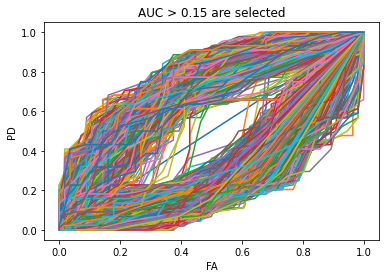

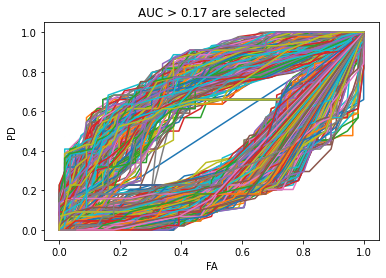

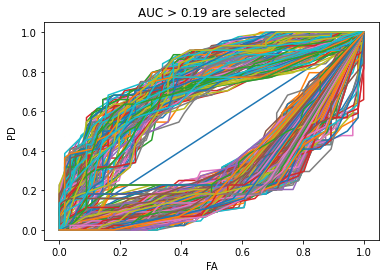

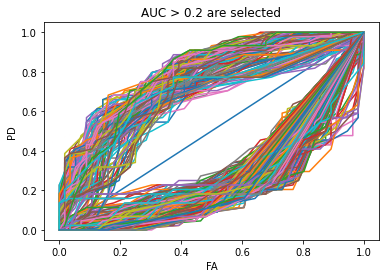

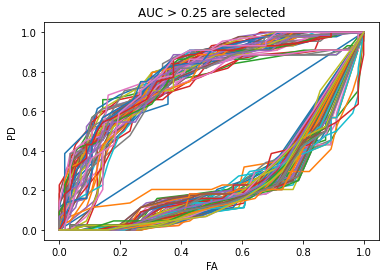

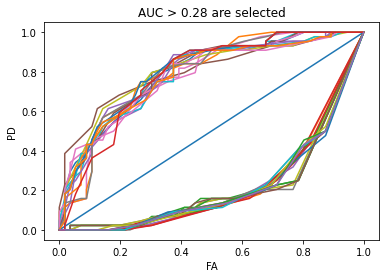

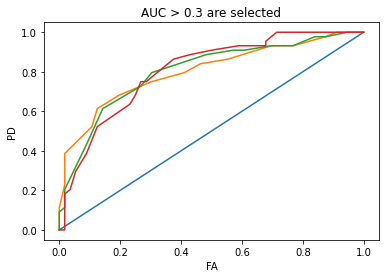

In [17]:
import matplotlib.pyplot as plt
t = np.arange(0, 1, 0.001)

for a_level in auc_area:
  plt.plot(t, t)
  
  plt.ylabel('PD')
  plt.xlabel('FA')
  plt.title('AUC > {} are selected'.format(a_level))

  for i in range(len(train_dataset[0])):
    auc_result, alpha, One_Beta = auc_feature_selction(train_dataset, train_label, i, a_level)
    if auc_result:
      plt.plot(alpha, One_Beta)
  plt.show()

plt.show()


#Features Selection According to Features' Similarity
We compare the feature vectors and exclude the features similar much to previos shown features. We use cosine function to compare the similarity and set the consine value as exclusion boundary.

In [0]:
def cosine_similarity(vec_a, vec_b):
  assert len(vec_a) == len(vec_b)
  if sum(vec_a) == 0 or sum(vec_b) == 0:
    return 0 # hack
  a_b = sum(i[0] * i[1] for i in zip(vec_a, vec_b))
  a_2 = sum([i*i for i in vec_a])
  b_2 = sum([i*i for i in vec_b])
  return a_b/(math.sqrt(a_2) * math.sqrt(b_2))

def get_vec(matrix_x, col_index):
  return([matrix_x[row_index][col_index] for row_index in range(len(matrix_x))])


In [19]:
similarity_criteria = [0.2, 0.4, 0.6, 0.8]
similarity_file_path = 'similarity.cvs'

def similarity_feature_selction(data, sim_criteron):
  feat_len = len(data[0])
  # feat_len = 10

  selected_feature = [True for i in range(feat_len)]
  
  for first_vec_index in range(feat_len-1):
    if selected_feature[first_vec_index] == True:
      vec_a = get_vec(data, first_vec_index)

      for second_vec_index in range(first_vec_index+1, feat_len):
        vec_b = get_vec(data, second_vec_index)
        if cosine_similarity(vec_a, vec_b) > sim_criteron:
          selected_feature[second_vec_index] = False

  return selected_feature

if logging.getLogger().getEffectiveLevel() == logging.DEBUG:

  sim_feature_selection_collection = {}
  for sim_criteron in similarity_criteria:
    feature_selection = similarity_feature_selction(train_dataset, sim_criteron)
    sim_feature_selection_collection[sim_criteron] = feature_selection
    logging.info("Similarity {}, No. of feaature: {}, feature set (the first 100 items): {}".format(sim_criteron, len(feature_selection), feature_selection[0:100]))
    logging.info("No. of selected feaature: {}".format((len([1 for i in feature_selection if i == True]))))
  
  similarity_feature_selection_file = similarity_file_path
  sim_df = pd.DataFrame({key:pd.Series(value) for key, value in sim_feature_selection_collection.items()})
  sim_df.to_csv(similarity_feature_selection_file)

Similarity 0.2, No. of feaature: 10000, feature set (the first 100 items): [True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
No. of selected feaature: 169
Similarity 0.4, No. of feaature: 10000, feature set (the first 100 items): [True, True, False, False, True, False, False, True, False, False, False, True, False, True, False, False, False, True, False,

In [20]:
similarity_file_path = 'similarity.cvs'

if os.path.isfile(similarity_file_path):
  logging.info("import sim_feature_selection_collection from file {}".format(similarity_file_path))
  df = pd.read_csv(similarity_file_path)
  sim_feature_selection_collection = {}
  for sim_criteron in similarity_criteria:
    feature_selection = [item for index, item in enumerate(df[str(sim_criteron)]) if item != "NaN"]
    sim_feature_selection_collection[sim_criteron] = feature_selection
    logging.info("Similarity {}, No. of feaature: {}, feature set (the first 100 items): {}".format(sim_criteron, len(feature_selection), feature_selection[0:100]))
    logging.info("No. of selected feaature: {}".format((len([1 for i in feature_selection if i == True]))))
else:
  logging.info("{} not found. Process the Similarity features selection.".format(similarity_file_path))
  sim_feature_selection_collection = {}
  for sim_criteron in similarity_criteria:
    feature_selection = similarity_feature_selction(train_dataset, sim_criteron)
    sim_feature_selection_collection[sim_criteron] = feature_selection
    logging.info("Similarity {}, No. of feaature: {}, feature set (the first 100 items): {}".format(sim_criteron, len(feature_selection), feature_selection[0:100]))
    logging.info("No. of selected feaature: {}".format((len([1 for i in feature_selection if i == True]))))
  
  logging.info("export sim_feature_selection_collection to file {}".format(similarity_file_path))
  similarity_feature_selection_file = similarity_file_path
  sim_df = pd.DataFrame({key:pd.Series(value) for key, value in sim_feature_selection_collection.items()})
  sim_df.to_csv(similarity_feature_selection_file)

import sim_feature_selection_collection from file similarity.cvs
Similarity 0.2, No. of feaature: 10000, feature set (the first 100 items): [True, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]
No. of selected feaature: 169
Similarity 0.4, No. of feaature: 10000, feature set (the first 100 items): [True, True, False, False, True, False, False, True, False, F

#Get Selected Features according to Feature Selection Result of Different Methods

In [0]:
def get_selected_feature_in_class(data, label, feature_sel, class_set):
  return [[data[row_index][col_index] \
    for col_index in range(len(data[0])) if feature_sel[col_index] == True] \
    for row_index in range(len(data)) if label[row_index] == class_set]

def compute_mean(data):
  return np.mean(data, axis = 0)

def compute_cov_matrix(data):
  alpha = 0.01
  cov_matrix = np.cov(data, rowvar = False, bias = True)
  return cov_matrix + alpha * np.identity(cov_matrix.shape[0])

if logging.getLogger().getEffectiveLevel() == logging.DEBUG:
  class_w0 = get_selected_feature_in_class(train_dataset, train_label, h0_feature_selection_collection[0.95], w0)
  class_w1 = get_selected_feature_in_class(train_dataset, train_label, h0_feature_selection_collection[0.95], w1)
  
  class_w0_mean = compute_mean(class_w0)
  class_w0_cov_matrix = compute_cov_matrix(class_w0)
  class_w0_inv_cov_matrix = np.linalg.inv(class_w0_cov_matrix)
  class_w0_cov_matrix_det = np.linalg.det(class_w0_cov_matrix)

  #logging.info("Class W0:\nRow: {}, Col: {}\nData: {}".format(len(class_w0), len(class_w0[0]), class_w0))
  #logging.info("Class W0 mean:\n{}".format(class_w0_mean))
  #logging.info("Class W0 Covariance Matrix:\n{}".format(class_w0_cov_matrix))
  #logging.info("Class W0 Inverse Covariance Matrix:\n{}".format(class_w0_inv_cov_matrix))
  #logging.info("Class W0 Covariance Matrix Determinant:\n{}".format(class_w0_cov_matrix_det))

  class_w1_mean = compute_mean(class_w1)
  class_w1_cov_matrix = compute_cov_matrix(class_w1)
  class_w1_inv_cov_matrix = np.linalg.inv(class_w1_cov_matrix)
  class_w1_cov_matrix_det = np.linalg.det(class_w1_cov_matrix)

  #logging.info("Class W1:\nRow: {}, Col: {}\nData: {}".format(len(class_w1), len(class_w1[0]), class_w1))
  #logging.info("Class W1 mean:\n{}".format(class_w1_mean))
  #logging.info("Class W1 Covariance Matrix:\n{}".format(class_w1_cov_matrix))
  #logging.info("Class W1 Inverse Covariance Matrix:\n{}".format(class_w1_inv_cov_matrix))
  #logging.info("Class W1 Covariance Matrix Determinant:\n{}".format(class_w1_cov_matrix_det))


#Perform Baysian Classification
Classify x random variables with K features into M classes.  We will compute p(w1|x), p(w2|x), ... p(wM|x) and assign x to wi if p(wi|x) > p(wj|x) for i<>j.
According to Baysian Classification, p(wi|x) = p(x|wi)\*p(wi)/p(x) = p(x|wi)\*p(wi)/summation of (p(x|wj)\*p(wj) for j=1..M).
Since summation of (p(x|wj)\*p(wj) for j=1..M are all equal for any class i, we will only compute p(x|wi)\*p(wi).
Assume x is a multivariance normal distribution with K dimensions, the likelihood function is 1/((2pi^(K/2))(determinant of covariance matrix)) \* exp (-1/2 (x-u)T(inverse of covariance matrix)(x-u)). Insteade of computing p(x|wi)\*p(wi), we prefer to compute log of (p(x|wi)\*p(wi)).
```
Log(p(x|wi)\*p(wi))
= log(p(x|wi) + log(p(wi))
= - (K/2)log(2pi) - 1/2*log(|E|) - 1/2 (x-u)T(A)(x-u) + log(p(wi))
= - (K/2)log(2pi) - 1/2*log(|E|) - 1/2 (xTAx - uTAx - xTAu + uTAu) + log(p(wi))
```

In [0]:
def show_matrix_row_col(matrix_x):
  print(matrix_x.shape[0], matrix_x.shape[1])

def valid_data_classifier(data, valid_label, feature_sel, w0_mean, w0_inv_cov_matrix, w1_mean, w1_inv_cov_matrix):
  correct = 0
  result_array = []
  for row_index in data:
    x_1D = np.array([data[row_index][col_index] for col_index in range(len(data[row_index])) if feature_sel[col_index] == True])
    
    x0_1D = x_1D - w0_mean
    x0_2D = x0_1D.reshape(x0_1D.shape[0], 1)
    x0_2DT = x0_1D.reshape(1, x0_1D.shape[0]) 
    pw0_x = -np.dot(np.dot(x0_2DT, w0_inv_cov_matrix), x0_2D)[0][0] / 2 + np.log(pw0)
    
    x1_1D = x_1D - w1_mean
    x1_2D = x1_1D.reshape(x1_1D.shape[0], 1)
    x1_2DT = x1_1D.reshape(1, x1_1D.shape[0])   
    pw1_x = -np.dot(np.dot(x1_2DT, w1_inv_cov_matrix), x1_2D)[0][0] / 2 + np.log(pw1)

    result = 1 if pw0_x > pw1_x else -1
    result_array = result_array + [result]
    #logging.debug("pw0: {:20.15}, pw1: {:20.15}, result: {:3}, label: {:3}".format(pw0_x, pw1_x, result, valid_label[row_index]))

    if result == valid_label[row_index]:
      correct = correct + 1
      
  logging.debug("result: {}".format(result_array))
  logging.debug("label : {}".format(valid_label))

  return correct / len(valid_label)

In [0]:
def perform_validation_on_method(train_dataset, train_label, feature_selection_collection):
  for level in feature_selection_collection:
    logging.info("No. of selected feaature: {}".format((len([1 for i in feature_selection_collection[level] if i == True]))))

    class_w0 = get_selected_feature_in_class(train_dataset, train_label, feature_selection_collection[level], w0)
    class_w1 = get_selected_feature_in_class(train_dataset, train_label, feature_selection_collection[level], w1)
  
    class_w0_mean = compute_mean(class_w0)
    class_w0_cov_matrix = compute_cov_matrix(class_w0)
    class_w0_inv_cov_matrix = np.linalg.inv(class_w0_cov_matrix)
    class_w0_cov_matrix_det = np.linalg.det(class_w0_cov_matrix)

    #logging.info("Class W0:\nRow: {}, Col: {}".format(len(class_w0), len(class_w0[0])))
    #logging.info("Data: {}".format(class_w0))
    #logging.info("Class W0 mean:\n{}".format(class_w0_mean))
    #logging.info("Class W0 Covariance Matrix:\n{}".format(class_w0_cov_matrix))
    #logging.info("Class W0 Inverse Covariance Matrix:\n{}".format(class_w0_inv_cov_matrix))
    #logging.info("Class W0 Covariance Matrix Determinant:\n{}".format(class_w0_cov_matrix_det))

    class_w1_mean = compute_mean(class_w1)
    class_w1_cov_matrix = compute_cov_matrix(class_w1)
    class_w1_inv_cov_matrix = np.linalg.inv(class_w1_cov_matrix)
    class_w1_cov_matrix_det = np.linalg.det(class_w1_cov_matrix)

    #logging.info("Class W1:\nRow: {}, Col: {}".format(len(class_w1), len(class_w1[0])))
    #logging.info("Data: {}".format(class_w1))
    #logging.info("Class W1 mean:\n{}".format(class_w1_mean))
    #logging.info("Class W1 Covariance Matrix:\n{}".format(class_w1_cov_matrix))
    #logging.info("Class W1 Inverse Covariance Matrix:\n{}".format(class_w1_inv_cov_matrix))
    #logging.info("Class W1 Covariance Matrix Determinant:\n{}".format(class_w1_cov_matrix_det))

    acc = valid_data_classifier(valid_dataset, valid_label, feature_selection_collection[level], class_w0_mean,
                                class_w0_inv_cov_matrix, class_w1_mean, class_w1_inv_cov_matrix)
    logging.info("Level: {}, accuracy: {}".format(level, acc))

#Valid the Data Based on All Features

In [24]:
all_true = [True for i in range(10000)]
all_feature_selected = {1: all_true}
logging.info("Valid the Data Based on all features")
perform_validation_on_method(valid_dataset, valid_label, all_feature_selected)

Valid the Data Based on all features
No. of selected feaature: 10000
result: [-1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1]
label : [-1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1]
Level: 1, accuracy: 1.0


#Valid the Data Based on H0 Hypothesis

In [25]:
logging.info("Valid the Data Based on H0 Hypothesis")
perform_validation_on_method(valid_dataset, valid_label, h0_feature_selection_collection)

Valid the Data Based on H0 Hypothesis
No. of selected feaature: 5456
result: [-1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1]
label : [-1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1]
Level: 0.8, accuracy: 1.0
No. of selected feaature: 5013
result: [-1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1,

#Valid the Data Based on AUC

In [26]:
logging.info("Valid the Data Based on AUC")
perform_validation_on_method(valid_dataset, valid_label, auc_feature_selection_collection)

Valid the Data Based on AUC
No. of selected feaature: 2070
result: [-1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1]
label : [-1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1]
Level: 0.15, accuracy: 1.0
No. of selected feaature: 1578
result: [-1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -

#Valid the Data Based on Similarity

In [27]:
logging.info("Valid the Data Based on Similarity")
perform_validation_on_method(valid_dataset, valid_label, sim_feature_selection_collection)

Valid the Data Based on Similarity
No. of selected feaature: 169
result: [-1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1]
label : [-1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1]
Level: 0.2, accuracy: 0.94
No. of selected feaature: 298
result: [-1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1,